
# Exploratory Data Analyses

## Power Measurements Dataset

This dataset contains high frequency interval (30 minutes) power measurements in the retail and industrial sector.

### Columns of Interest

- **AccountID** (4301 unique values): The customer’s account, i.e., 4301 unique customer accounts.
- **Costcentre** (15 unique categories): Billing allocation according to power source or load. Categorizes what the load or supply is.
- **MeterpointID** (10,848 unique values): Virtual power meter.
- **MeterpointType** (25 unique values): Energy Consumption Categories or Metered Energy Usage, e.g., Grid, Generator, Solar, refrigeration, extractor fan, etc.
- **MarketSector** (79 unique values): Market sector that the consumer is operating in.
- **Meterpoint_ID** (10,281 unique values): Virtual power meter. This column is linked to multiple Meter_IDs.
- **Meter_ID** (10,627 unique values): Multiple Meter_IDs can be aggregated to a single Meterpoint_ID.
- **RDATE**: The 30-minute interval that the power measurement has been done. For example, “2024-01-01 10:00:00” indicates a reading on January 1, 2024, at 10 AM.
- **P1**: The real power in kWh (kilowatt hour) consumed or generated for that 30-minute interval.
- **Q1**: The imaginary power in kVArh (kilo reactive volt-amp hour) consumed or generated for that 30-minute interval.

### Setting Up Dask for Parallel Computing

In this section, we will initialize a Dask client to distribute tasks across multiple workers. This setup will enable us to leverage parallel processing for our exploratory analyses.

#### Importing Dask and Setting Up the Client

First, we'll import the necessary modules from Dask and attempt to create a Dask client. The Dask client manages the distributed computation environment.

In [62]:
import dask
from dask.distributed import Client

try:
    client
except NameError:
    print("No dask client defined, starting client")
    client = Client(n_workers=16, threads_per_worker=2, memory_limit='30GB')  # start distributed scheduler locally.
else:
    print("Dask client already defined.")

# Display the client details to confirm it's running
client

Dask client already defined.


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 16
Total threads: 32,Total memory: 447.03 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:57509,Workers: 16
Dashboard: http://127.0.0.1:8787/status,Total threads: 32
Started: 1 hour ago,Total memory: 447.03 GiB
Comm: tcp://127.0.0.1:57596,Total threads: 2
Dashboard: http://127.0.0.1:57601/status,Memory: 27.94 GiB
Nanny: tcp://127.0.0.1:57512,


In [63]:

import dask.dataframe as dd
import pandas as pd
import pprint

print(f'Dask versoin: {dask.__version__}')
print(f'Pandas versoin: {pd.__version__}')

# Read the CSV file with specified data ypes
df = dd.read_csv(
    "sourcedata/pdata_anon.csv",
    dtype= {
    'AccountID': 'int64',
    'Costcentre': 'object',
    'MarketSector': 'object',
    'MeterpointID': 'int64',
    'MeterPointType': 'object',
    'MeterPointType_id': 'int64',
    'UnixTimestamp': 'uint64',
    'P1': 'float64',
    'Q1': 'float64',
    'MeterID': 'int64',
    'SNUMBER': 'object',
    'Getnorm': 'float64' 
})

# Assign Dask DataFrame and assign partitions
df = df.repartition(partition_size='0.1GB')  # Adjust partition size as needed, not too small otherwise overhead will be too much, too few partitions will lead to under utilisation of resources
print(f"Currently assigning {df.npartitions} dask partitions")


Dask versoin: 2024.5.0
Pandas versoin: 2.2.2
Currently assigning 60 dask partitions


## Exploring the Dataset

To understand the structure and contents of our dataset, it's important to examine both the beginning and the end of the data. This allows us to get a sense of the initial records, any potential headers or indexes, and how the data is structured overall. 

### Displaying the First Few Rows

We use the `head()` method to view the first few rows of the dataset. This helps us understand the format of the data, the column names, and the initial values.


In [64]:
#Lets have a look at what the data looks like
print("\n\nHEAD:")
display(df.head(10))

print("\n\nTAIL:")
display(df.tail(10))



HEAD:


,AccountID,Costcentre,MeterpointID,MeterPointType_id,MeterPointType,MarketSector,Getnorm,SNUMBER,MeterID,UnixTimestamp,P1,Q1
0,10000001,Active Tenants,20000001,3,Primary Supply,Offices,204.0,30000001,30000001,1704079800,0.000,0.000
1,10000002,Active Tenants,20000002,3,Primary Supply,Offices,139.0,30000002,30000002,1704079800,0.104,0.008
2,10000003,Active Tenants,20000003,3,Primary Supply,Offices,165.0,30000003,30000003,1704079800,0.000,0.000
3,10000004,Vacant Tenants,20000004,3,Primary Supply,Offices,858.0,30000004,30000004,1704079800,0.125,0.000
4,10000005,Active Tenants,20000005,3,Primary Supply,Restaurant and Bar,247.0,30000005,30000005,1704079800,4.459,0.311
5,10000006,Active Tenants,20000006,3,Primary Supply,Fashion: Unisex Wear,46.0,30000006,30000006,1704079800,0.022,0.000
6,10000007,Active Tenants,20000007,3,Primary Supply,General Retail,0.0,30000007,30000007,1704079800,10.500,0.000
7,10000008,Active Tenants,20000008,3,Primary Supply,Offices,3366.0,30000008,30000008,1704079800,9.750,0.000
8,10000009,Active Tenants,20000009,3,Primary Supply,Cosmetics and Perfumery,53.0,30000009,30000009,1704079800,0.082,0.000
9,10000010,Active Tenants,20000010,3,Primary Supply,Jewellery,164.0,30000010,30000010,1704079800,1.172,0.000




TAIL:


,AccountID,Costcentre,MeterpointID,MeterPointType_id,MeterPointType,MarketSector,Getnorm,SNUMBER,MeterID,UnixTimestamp,P1,Q1
521028,10000683,AHU,20001092,3,Primary Supply,Unknown,0.0,30008333,30008333,1704745800,14.525000,13.250000
521029,10001289,Combined Grid and Solar Supply,20001761,3,Primary Supply,Unknown,0.0,30008334,30008334,1704745800,151.360000,0.000000
521030,10001035,Active Tenants,20001460,3,Primary Supply,Food: Fast Food,36.0,30008335,30008335,1704745800,3.974000,1.145000
521031,10002060,Active Tenants,20008203,18,Essential Supply,Restaurant and Bar,17490.0,30008335,30008335,1704745800,3.974000,1.145000
521032,10001055,Active Tenants,20008204,3,Primary Supply,Outdoor goods & wear,615.0,30008336,30008336,1704745800,2.375000,0.000000
521033,10000998,AHU,20001421,3,Primary Supply,Unknown,0.0,30008337,30008337,1704745800,2.141000,1.295000
521034,10001676,Active Tenants,20003416,3,Primary Supply,Homeware & Interior,1637.0,30008338,30008338,1704745800,2.590000,0.000000
521035,10000743,Common Area,20001152,3,Primary Supply,Unknown,0.0,30008339,30008339,1704745800,0.433517,0.682919
521036,10003561,Active Tenants,20008205,3,Primary Supply,Vacant Shops,285.0,30008340,30008340,1704745800,2.260000,0.020000
521037,10001621,Active Tenants,20008206,3,Primary Supply,General Retail,141.0,30008341,30008341,1704745800,0.375000,0.000000


## Converting Unix Timestamps to Human-Readable Datetime

Unix timestamps are often used to represent time in a numerical format. These timestamps count the number of seconds since January 1, 1970 (the Unix epoch). To make the data more understandable, we will convert these timestamps to a human-readable datetime format.

### Getting a Sample of the Data

We'll start by extracting a small sample of the dataset to perform the conversion and verify the results.

In [65]:
#Note that the time is in Unix timestamp format, lets convert it to something more human readable

#get a small sample
head_df = df.head()

# Convert UnixTimestamp to a human readable datetime format
head_df['UnixTimestamp'] = pd.to_datetime(head_df['UnixTimestamp'], unit='s',utc=True)
head_df['UnixTimestamp'] = head_df['UnixTimestamp'].dt.tz_convert('Canada/Newfoundland')  # Replace with your local timezone

#Display the data
display(head_df.head())

#Note that the date starts at 00H00 UTC and the 03:30:00 we are seeing is the Newfoundland local time difference. When the data was exported from the SQL database it was exported with NL time as the default timezone and not true UTC=0 offset.

,AccountID,Costcentre,MeterpointID,MeterPointType_id,MeterPointType,MarketSector,Getnorm,SNUMBER,MeterID,UnixTimestamp,P1,Q1
0,10000001,Active Tenants,20000001,3,Primary Supply,Offices,204.0,30000001,30000001,2024-01-01 00:00:00-03:30,0.000,0.000
1,10000002,Active Tenants,20000002,3,Primary Supply,Offices,139.0,30000002,30000002,2024-01-01 00:00:00-03:30,0.104,0.008
2,10000003,Active Tenants,20000003,3,Primary Supply,Offices,165.0,30000003,30000003,2024-01-01 00:00:00-03:30,0.000,0.000
3,10000004,Vacant Tenants,20000004,3,Primary Supply,Offices,858.0,30000004,30000004,2024-01-01 00:00:00-03:30,0.125,0.000
4,10000005,Active Tenants,20000005,3,Primary Supply,Restaurant and Bar,247.0,30000005,30000005,2024-01-01 00:00:00-03:30,4.459,0.311


## Examining the DataFrame: Summary and Structure

To better understand the dataset, we need to look at various aspects of the DataFrame, including its summary statistics, data types of columns, and the column names. This will help us grasp the structure and basic characteristics of the data.

### Summary Statistics of the DataFrame

We start by viewing the summary statistics of the DataFrame, which provides a quick overview of key statistical metrics such as mean, standard deviation, and quartiles for each numeric column.

In [66]:
#Let's look at the description, data types and columns of the DataFrame

display('Description of DataFrame',df.describe())
display('Description of data types',df.dtypes)
display('Description of columns,',df.columns)

'Description of DataFrame'

,AccountID,MeterpointID,MeterPointType_id,Getnorm,MeterID,UnixTimestamp,P1,Q1
npartitions=1,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...


'Description of data types'

AccountID                      int64
Costcentre           string[pyarrow]
MeterpointID                   int64
MeterPointType_id              int64
MeterPointType       string[pyarrow]
MarketSector         string[pyarrow]
Getnorm                      float64
SNUMBER              string[pyarrow]
MeterID                        int64
UnixTimestamp                 uint64
P1                           float64
Q1                           float64
dtype: object

'Description of columns,'

Index(['AccountID', 'Costcentre', 'MeterpointID', 'MeterPointType_id',
       'MeterPointType', 'MarketSector', 'Getnorm', 'SNUMBER', 'MeterID',
       'UnixTimestamp', 'P1', 'Q1'],
      dtype='object')

## Checking for Duplicate Entries in the DataFrame

To ensure data quality, it's important to check for and handle any duplicate entries within the DataFrame. In this section, we'll identify duplicates and analyze their distribution.

### Identifying Duplicate Rows

1. **Remove Duplicates**: We first create a new DataFrame `df2` by removing duplicate rows from the original DataFrame `df`.
2. **Compute DataFrames**: We compute the DataFrames `df1` and `df2` to get the complete results from any distributed computation.
3. **Count Duplicates**: We calculate the number of duplicates by comparing the counts of the original and deduplicated DataFrames. The difference between the counts indicates how many duplicates were present.

### Analyzing Duplicate Data

4. **Group by All Columns**: We group the DataFrame `df1` by all columns and count the occurrences of each unique row.
5. **Identify Unique Rows**: We filter the rows where the count is 1, indicating that they are unique.
6. **Compare DataFrame Shapes**: We check if the shapes of the original and deduplicated DataFrames are the same to confirm if any duplicates were removed.
7. **Identify Duplicate Rows**: If the shapes differ, we identify rows that are common in both DataFrames (i.e., duplicates) and display them.
8. **Display Unique Rows**: We also display the unique rows found in the DataFrame.

### Cleanup

9. **Release Unused DataFrames**: Finally, we delete the DataFrames `df1` and `df2` to free up memory.

This process ensures that we can effectively identify and handle duplicate entries in our dataset, improving its quality for further analysis.


In [67]:
#Let's see if we have duplicate entries in our DataFrame

# Get unique rows
df2 = df.drop_duplicates()

# Compute to get DataFrames
df1 = df.compute()
df2 = df2.compute()

print("How many duplicates exist within the DataFrame?")
print((df1.count()-df2.count()).reset_index(name='Duplicates'))

# Group by all columns and count occurrences
grouped = df1.groupby(list(df1.columns)).size().reset_index(name='count')

# Rows that are unique to each DataFrame
unique_rows = grouped[grouped['count'] == 1].drop(columns='count')

# Check if DataFrames have the same shape
if df1.shape == df2.shape:
    print("\nThe DataFrames have the same shape")
else:
    print("\nThe DataFrames do not have the same shape.")

    # Rows that are common in both DataFrames
    duplicate_rows = grouped[grouped['count'] > 1].drop(columns='count')

    print("\nDuplicate Rows:","{:,}".format(len(duplicate_rows)))
    display(duplicate_rows)

print("\nUnique Rows:","{:,}".format(len(unique_rows)))
display(unique_rows)

#Release unused DataFrames
del df1, df2

How many duplicates exist within the DataFrame?
                index  Duplicates
0           AccountID           0
1          Costcentre           0
2        MeterpointID           0
3   MeterPointType_id           0
4      MeterPointType           0
5        MarketSector           0
6             Getnorm           0
7             SNUMBER           0
8             MeterID           0
9       UnixTimestamp           0
10                 P1           0
11                 Q1           0

The DataFrames have the same shape

Unique Rows: 16,085,315


,AccountID,Costcentre,MeterpointID,MeterPointType_id,MeterPointType,MarketSector,Getnorm,SNUMBER,MeterID,UnixTimestamp,P1,Q1
0,10000001,Active Tenants,20000001,3,Primary Supply,Offices,204.0,30000001,30000001,1704079800,0.000,0.00
1,10000001,Active Tenants,20000001,3,Primary Supply,Offices,204.0,30000001,30000001,1704081600,0.016,0.00
2,10000001,Active Tenants,20000001,3,Primary Supply,Offices,204.0,30000001,30000001,1704083400,0.008,0.00
3,10000001,Active Tenants,20000001,3,Primary Supply,Offices,204.0,30000001,30000001,1704085200,0.004,0.00
4,10000001,Active Tenants,20000001,3,Primary Supply,Offices,204.0,30000001,30000001,1704087000,0.016,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
16085310,10003772,Combined Grid and Solar Supply,20008242,3,Primary Supply,Unknown,0.0,JETTOT,30008380,1704736800,51.320,0.04
16085311,10003772,Combined Grid and Solar Supply,20008242,3,Primary Supply,Unknown,0.0,JETTOT,30008380,1704738600,50.560,0.84
16085312,10003772,Combined Grid and Solar Supply,20008242,3,Primary Supply,Unknown,0.0,JETTOT,30008380,1704740400,40.960,0.12
16085313,10003772,Combined Grid and Solar Supply,20008242,3,Primary Supply,Unknown,0.0,JETTOT,30008380,1704742200,41.280,0.16


## Computing Unique Counts for Specific Columns

To gain insights into the diversity of values within selected columns, we will compute the number of unique entries for each specified column. 

### List of Columns

We have identified a set of columns for which we want to determine the unique counts. These columns are:

- `AccountID`
- `Costcentre`
- `MarketSector`
- `MeterpointID`
- `MeterPointType`
- `MeterPointType_id`
- `MeterID`
- `SNUMBER`

### Computing Unique Counts

We will calculate the unique counts for each of these columns and store the results in a dictionary. As each count is computed, we will display the number of unique entries for that column.

This process provides a quick overview of the uniqueness within these key columns of the DataFrame, helping to understand the variability and distribution of values.


In [68]:
# List of columns for which to compute the unique counts
columns_to_count = [
    'AccountID', 'Costcentre', 'MarketSector', 'MeterpointID',
    'MeterPointType', 'MeterPointType_id', 'MeterID', 'SNUMBER'
]

# Dictionary to hold the unique counts
unique_counts = {}

print("There are:")

# Compute unique counts for each column
for column in columns_to_count:
    unique_counts[column] = df[column].nunique().compute()
    #Print as we compute
    print(f"{unique_counts[column]} Unique {column}s")

There are:
3855 Unique AccountIDs
15 Unique Costcentres
79 Unique MarketSectors
8716 Unique MeterpointIDs
24 Unique MeterPointTypes
24 Unique MeterPointType_ids
8916 Unique MeterIDs
8916 Unique SNUMBERs


## Extracting and Displaying Unique Values for Specific Columns

We will extract and display the unique values for the `Costcentre` and `MarketSector` columns from the DataFrame.

### Creating a Dictionary of Unique Values

1. **Initialization**: We create an empty dictionary to store unique values.

2. **Storing Unique Values**: For each specified column (`Costcentre` and `MarketSector`), we compute and store the unique values in the dictionary.

### Displaying the Results

3. **Print Dictionary**: We print the dictionary containing unique values for each column.

4. **Detailed Output**: We provide a detailed list of unique values for each column, including an index for easier reference.

This process helps in understanding the distinct entries within the `Costcentre` and `MarketSector` columns and provides a structured overview of their unique values.


In [69]:
#Populate a Dictionary of unique values for both Costcentre and MarketSector
columns_to_print = ['Costcentre', 'MarketSector']

#Create an empty dictionary
business_Attributes_dict= {}

# Store unique values for each column in the dictionary
for column in columns_to_print:
    business_Attributes_dict[column] = df[column].unique().compute()

#pprint.pprint(business_Attributes_dict)

#Print the dictionary
for key, values in business_Attributes_dict.items():
    print(f"\n{key}: \n")
    for value,idx in enumerate(values, start=1):
        print(f"{value}: {idx}")


Costcentre: 

1: Grid Supply
2: AHU
3: Generator Supply
4: Signage
5: Parking
6: Solar Supply
7: Store Room
8: Combined Grid and Solar Supply
9: Vacant Tenants
10: Prepaid Tenants
11: Active Tenants
12: Common Area
13: Chiller
14: Non Recoverable
15: Total Supply to Centre

MarketSector: 

1: ATM
2: Sports wear
3: Entertainment Centres
4: Electronics & Games
5: Home Furnishing, Art, Antiques,Décor
6: Offices
7: Unknown
8: Pharmacy and personal care
9: Food: Fast Food
10: Liquor Store
11: Hardware, security & Home Improvement
12: Luxury Goods
13: Supermarket: Small
14: Hospital
15: Theatre/Venue
16: Bank
17: Photography
18: Car wash
19: Outdoor goods & wear
20: Fashion: Children's Wear
21: Postal & E-commerce services
22: Jewellery
23: Luggage & Leather ware
24: Vacant Shops
25: Medical
26: Office/Business Centre
27: Optometrists
28: Food Speciality
29: Watches
30: Billboard
31: Fashion: Lingerie & swimwear
32: Retail: Food and Textile
33: Fashion: Unisex Wear
34: Fashion: Men's Wear
3

## Analyzing Unique Account Counts by Market Sector

We will analyze the number of unique `AccountID`s for each `MarketSector` to understand the distribution of unique accounts across different sectors.

### Steps Involved

1. **Convert DataFrame**: Extract the relevant columns (`MarketSector` and `AccountID`) and convert the DataFrame to a Dask DataFrame for efficient computation.

2. **Group and Count**: Group the data by `MarketSector` and count the number of unique `AccountID`s in each sector.

3. **Sort Results**: Sort the counts in descending order to identify the sectors with the highest number of unique accounts.

4. **Display Results**: Print the sorted results, showing each `MarketSector` alongside the count of unique `AccountID`s.

This analysis provides insights into the distribution of unique accounts across different market sectors, highlighting areas with the most significant presence of unique accounts.

In [70]:
# Convert your dataframe to a Dask dataframe
ddf = df[['MarketSector', 'AccountID']]

# Group by MarketSector and count unique AccountIDs
sector_counts = ddf.groupby('MarketSector')['AccountID'].nunique().compute()

# Sort the counts in descending order
sorted_sector_counts = sector_counts.sort_values(ascending=False)

# Print or use sorted_sector_counts as needed
for sector, count in sorted_sector_counts.items():
    print(f"Market Sector: {sector} - Unique AccountID Count: {count}")

Market Sector: Unknown - Unique AccountID Count: 1050
Market Sector: Fashion: Unisex Wear - Unique AccountID Count: 288
Market Sector: Offices - Unique AccountID Count: 233
Market Sector: Vacant Shops - Unique AccountID Count: 209
Market Sector: Shoes - Unique AccountID Count: 161
Market Sector: Food: Fast Food - Unique AccountID Count: 142
Market Sector: Restaurant and Bar - Unique AccountID Count: 116
Market Sector: Cell phones and supporting services - Unique AccountID Count: 97
Market Sector: Fashion: Women's Wear - Unique AccountID Count: 96
Market Sector: Bank - Unique AccountID Count: 90
Market Sector: Jewellery - Unique AccountID Count: 88
Market Sector: Fashion: Men's Wear - Unique AccountID Count: 73
Market Sector: General Retail - Unique AccountID Count: 71
Market Sector: Sports wear - Unique AccountID Count: 67
Market Sector: ATM - Unique AccountID Count: 65
Market Sector: Computers & Electronics - Unique AccountID Count: 53
Market Sector: Cosmetics and Perfumery - Unique A

## Extracting and Displaying Unique MeterPoint Attributes

We will identify and display unique values for the `MeterPointType` and `MeterPointType_id` columns.

### Steps Involved

1. **Filter and Compute Unique Values**: We filter the DataFrame to include only the `MeterPointType` and `MeterPointType_id` columns, and then drop duplicate rows to obtain unique pairs of these attributes.

2. **Display Unique Values**: Print the unique values from the DataFrame to review the distinct entries for `MeterPointType` and `MeterPointType_id`.

3. **Create and Populate Dictionary**: Initialize a dictionary to map each `MeterPointType` to its corresponding `MeterPointType_id` by iterating over the unique pairs.

4. **Print the Dictionary**: Display the dictionary to show the unique `MeterPointType` and `MeterPointType_id` mappings.

This process provides a clear overview of the distinct `MeterPointType` and `MeterPointType_id` pairs in the dataset, along with their associations.


In [71]:
#Populate a Dictionary of unique values for both Costcentre and MarketSector
columns_to_print = ['MeterPointType', 'MeterPointType_id']

# Compute the unique values for MeterPointType and MeterPointType_id together
meterpoint_Attributes_df= df[['MeterPointType', 'MeterPointType_id']].drop_duplicates()

# Print the unique values in DataFrame
print("Unique values in MeterPointType and MeterPointType_id:")
print(meterpoint_Attributes_df.compute())

#Create an empty dictionary
meterpoint_Attributes_dict= {}

# Populate the dictionary 
for _, row in meterpoint_Attributes_df.compute().iterrows(): #Convert to pandas dataframe first
    meterpoint_Attributes_dict[row['MeterPointType']] = row['MeterPointType_id']

# Print the unique values in Dictionary
#pprint.pprint(meterpoint_Attributes_dict)

Unique values in MeterPointType and MeterPointType_id:
                            MeterPointType  MeterPointType_id
234                            Check Meter                 21
1551              Common Area Grid Portion                 23
312        Normal Supply Generator Portion                 54
17702                          Solar Panel                 46
324341                                 UPS                 47
494816          Refrigeration Grid Portion                 25
72                        Essential Supply                 18
74           Common Area Generator Portion                 22
479934                             Signage                  4
275                           Solar Export                217
981                   Chiller Grid Portion                 63
262             Normal Supply Grid Portion                 55
282439                   Air Handling Unit                187
0                           Primary Supply                  3
322435     Refr

## Displaying Unique Account IDs

To get a sense of the unique account identifiers in the dataset, we will extract and display the first 10 unique `AccountID` values.

### Steps Involved

1. **Extract Unique Account IDs**: We remove duplicate `AccountID` values to get a list of unique identifiers.

2. **Display Sample**: Print and display the first 10 unique `AccountID` values to provide an overview of the account identifiers in the dataset.

This process helps in verifying the uniqueness and initial set of account identifiers present in the data.


In [72]:
# Get unique AccountID values and display the first 10
unique_account_ids = df['AccountID'].drop_duplicates().head(10)

# Display the first 10 unique AccountID values
print("First 10 unique AccountID values:")
display(unique_account_ids)

First 10 unique AccountID values:


0     10000001
1     10000002
6     10000007
7     10000008
8     10000009
11    10000012
12    10000013
13    10000014
16    10000017
20    10000020
Name: AccountID, dtype: int64

## Collecting and Combining Data for Unique Account IDs

We will process data for each unique `AccountID` to gather relevant information and then combine the results into a single DataFrame.

### Steps Involved

1. **Initialize Result Collection**: Create an empty list to store the DataFrames containing data for each unique `AccountID`.

2. **Filter and Collect Data**: For each unique `AccountID`, filter the DataFrame to include rows corresponding to that `AccountID`, select relevant columns, and remove duplicates. Append each filtered DataFrame to the result list.

3. **Concatenate DataFrames**: Combine all the DataFrames in the result list into a single Dask DataFrame using concatenation.

4. **Display Combined Data**: Compute and display the concatenated DataFrame to review the aggregated results.

This approach consolidates information related to each unique `AccountID` into a comprehensive dataset for further analysis.


In [73]:
# Initialize an empty list to collect results
result_dataframes = []

# Iterate over each AccountID in the list
for account_id in unique_account_ids:
    # Filter rows where AccountID equals the current account_id
    filtered_df = df[df['AccountID'] == account_id]
    
    # Select relevant columns and drop duplicates
    collectDataLinkedAcc_dict= filtered_df[['AccountID', 'Costcentre', 'MeterpointID', 'MeterPointType_id',
                                 'MeterPointType', 'MarketSector', 'SNUMBER', 'MeterID']].drop_duplicates()
    
    # Append the collectDataLinkedAcc_dict to the result_dataframes list
    result_dataframes.append(collectDataLinkedAcc_dict)

# Concatenate all DataFrames in the result_dataframes list into a single Dask DataFrame
collectDataLinkedAcc_df = dd.concat(result_dataframes)

# Display the concatenated DataFrame
display(collectDataLinkedAcc_df.compute())

,AccountID,Costcentre,MeterpointID,MeterPointType_id,MeterPointType,MarketSector,SNUMBER,MeterID
0,10000001,Active Tenants,20000001,3,Primary Supply,Offices,30000001,30000001
81,10000001,Active Tenants,20000081,22,Common Area Generator Portion,Offices,am_nmsq_ot_common,30000075
1742,10000001,Active Tenants,20000081,22,Common Area Generator Portion,Offices,vm_nmsq_ot_recovery_gen,30001470
1,10000002,Active Tenants,20000002,3,Primary Supply,Offices,30000002,30000002
82,10000002,Active Tenants,20000082,22,Common Area Generator Portion,Offices,am_nmsq_ot_common,30000075
1743,10000002,Active Tenants,20000082,22,Common Area Generator Portion,Offices,vm_nmsq_ot_recovery_gen,30001470
6,10000007,Active Tenants,20000007,3,Primary Supply,General Retail,30000007,30000007
18,10000008,Active Tenants,20000008,3,Primary Supply,Offices,30000019,30000019
7,10000008,Active Tenants,20000008,3,Primary Supply,Offices,30000008,30000008
77,10000008,Active Tenants,20000077,22,Common Area Generator Portion,Offices,am_nmsq_ot_common,30000075


## Filtering and Analyzing Data for a Specific Account

We will focus on data related to a specific `AccountID` and examine relevant columns to understand the associated meter points and types.

### Steps Involved

1. **Select Account**: Specify the `AccountID` of interest to filter the DataFrame.

2. **Define Time Offset**: Set parameters for start and end time offsets (day, week, month) to filter the data within a specific time range.

3. **Filter Data**: Filter the DataFrame to include only rows for the specified `AccountID`.

4. **Select and Clean Columns**: Choose relevant columns (`AccountID`, `MeterpointID`, `MeterID`, `SNUMBER`, `MeterPointType`) and remove duplicate entries to focus on unique data points.

5. **Review Data**: Although displaying the data is optional, you can review the filtered and cleaned DataFrame to analyze specific details.

6. **Interpret Meter Data**: Examine the `MeterID` and `MeterPointType` columns to identify key categories like "Primary Supply" and aggregated values shared across multiple `AccountID`s, such as different types of generators and their functions (e.g., Air Handling Unit, Chiller, Common Area, Parking).

This approach allows for a detailed investigation of the meter data associated with a specific account and provides insights into the types and functions of various meter points.


In [88]:
# Account data is aggregated from the MeterpointID which in turn is aggregated from MeterID

#Let's select an account to look at
YOUR_ACCOUNT_ID = 10000009

#Speccifiy the the start and end time date offset
START_DAY = 0
START_WEEK = 1
START_MONTH= 0

END_DAY=0
END_WEEK=2
END_MONTH=0

#Filter datagrame according to AccountID
df_filtered = df[(df['AccountID'] == YOUR_ACCOUNT_ID)]

# Select specific columns
selected_columns = ['AccountID', 'MeterpointID', 'MeterID','SNUMBER','MeterPointType']
df_selected = df_filtered[selected_columns].drop_duplicates()

#Display the data
display(df_selected.compute())

#From the "MeterID" data we can see that there is a "Primary Supply" from the "MeterPointType" and then aggregated values ("Common Area Generator Portion") 
# shared by multiple "AccountID"s such as "vm_nmsq_rtl_ahu_gen", "vm_nmsq_chiller_gen","vm_nmsq_rrt_common_gen","vm_nmsq_rtl_parking_gen" which we can only 
# assume stands for "Air Handling Unit", "Chiller", "Common Area", "Parking" respectivley

,AccountID,MeterpointID,MeterID,SNUMBER,MeterPointType
8,10000009,20000009,30000009,30000009,Primary Supply
965,10000009,20000702,30000870,vm_nmsq_rtl_ahu_gen,Common Area Generator Portion
1008,10000009,20000702,30000872,vm_nmsq_chiller_gen,Common Area Generator Portion
1045,10000009,20000702,30000873,vm_nmsq_rrt_common_gen,Common Area Generator Portion
1653,10000009,20000702,30001441,vm_nmsq_rtl_parking_gen,Common Area Generator Portion
1719,10000009,20000702,30001469,vm_nmsq_recovery_gen,Common Area Generator Portion


## Analyzing Meter Point Details for the Selected Account

We will investigate the `MeterpointID`s to display associated `MeterID`s and `MeterPointType`s, providing insights into the types and identifiers linked to each meter point.

### Steps Involved

1. **Aggregate Meter Point Types**: Group the data by `MeterpointID` and aggregate the associated `MeterPointType`s into lists. Convert the result into a DataFrame for better readability.

2. **Display Meter Point Types**: Print and display the DataFrame showing the unique `MeterPointType`s linked to each `MeterpointID` for the specified account.

3. **Aggregate Meter IDs**: Similarly, group the data by `MeterpointID` and aggregate the associated `MeterID`s into lists. Convert this result into a DataFrame for clarity.

4. **Display Meter IDs**: Print and display the DataFrame showing the unique `MeterID`s linked to each `MeterpointID` for the specified account.

This analysis helps in understanding the relationship between meter points and their associated types and identifiers, offering detailed insights into the meter configuration for the account.


In [87]:
#Let's look at the MeterpointIDs and display the MeterIDs and MeterPointTypes linked to it.

# Group by MeterpointID and aggregate MeterPointType
result = df_selected.groupby('MeterpointID')['MeterPointType'].apply(list, meta=('MeterPointType', 'object')).compute()

# Convert the result to a DataFrame for better readability
uniqueMeterPointTypes_df = pd.DataFrame(result).reset_index()
print(f"\n\nUnique Meter Point Types associated with Account:{YOUR_ACCOUNT_ID} ")
display(uniqueMeterPointTypes_df)

# Group by MeterpointID and aggregate MeterID
result = df_selected.groupby('MeterpointID')['MeterID'].apply(list, meta=('MeterID', 'int64')).compute()

# Convert the result to a DataFrame for better readability
uniqueMeterIDs_df = pd.DataFrame(result).reset_index()

print(f"\n\nUnique Meter IDs associated with Account:{YOUR_ACCOUNT_ID} ")
display(uniqueMeterIDs_df)



Unique Meter Point Types associated with Account:10000009 


,MeterpointID,MeterPointType
0,20000009,[Primary Supply]
1,20000702,"[Common Area Generator Portion, Common Area Ge..."




Unique Meter IDs associated with Account:10000009 


,MeterpointID,MeterID
0,20000009,[30000009]
1,20000702,"[30000870, 30000872, 30000873, 30001441, 30001..."



## Filtering and Displaying Data for Specific Meter IDs

We will filter and process the data based on specific conditions to analyze and display information related to different `MeterID`s.

### Steps Involved

1. **Filter Data**: Extract rows from the DataFrame where the `AccountID` matches the specified account. Additional conditions can be applied as needed (e.g., specific `MeterID`s or `MeterpointID`s).

2. **Select Relevant Columns**: Choose columns that are necessary for plotting and analysis, such as `AccountID`, `MeterpointID`, `UnixTimestamp`, `MeterID`, `SNUMBER`, `P1`, and `Q1`.

3. **Convert Timestamps**: Convert `UnixTimestamp` values to a human-readable datetime format and adjust for the local timezone.

4. **Sort Data**: Ensure the DataFrame is sorted by `UnixTimestamp` for chronological analysis.

5. **Display Data for Each Meter ID**: Iterate through the list of unique `MeterID`s, filter the DataFrame for each `MeterID`, and display the first few rows of data to review the information.

This process enables detailed examination of data associated with each meter ID, including visualization and chronological organization.


In [89]:
#Let's look at the actual data of each MeterID associated with an AccountID 

# Filter the DataFrame based on conditions
df_filtered = df[(df['AccountID'] == YOUR_ACCOUNT_ID)] 

# Select only the columns needed for plotting
selected_columns = ['AccountID', 'MeterpointID','UnixTimestamp', 'MeterID','SNUMBER', 'P1', 'Q1']

df_selected = df_filtered[selected_columns]

# Convert UnixTimestamp to datetime if necessary
df_selected['UnixTimestamp'] = dd.to_datetime(df_selected['UnixTimestamp'], unit='s',utc=True)
df_selected['UnixTimestamp'] = df_selected['UnixTimestamp'].dt.tz_convert('Canada/Newfoundland')#('Africa/Johannesburg')#   # Replace with your local timezone

# Ensure the DataFrame is sorted by UnixTimestamp
df_selected = df_selected.sort_values('UnixTimestamp')

# Iterate through the MeterID lists and print the head for each MeterID
for idx, row in uniqueMeterIDs_df.iterrows():
    meter_ids = row['MeterID']
    for meter_id in meter_ids:
        print(f"\n\nHead of data for MeterID: {meter_id}")
        # Filter the DataFrame for the current MeterID
        meter_df = df_selected[df_selected['MeterID'] == meter_id].compute()
        display(meter_df.head())



Head of data for MeterID: 30000009


,AccountID,MeterpointID,UnixTimestamp,MeterID,SNUMBER,P1,Q1
8,10000009,20000009,2024-01-01 00:00:00-03:30,30000009,30000009,0.082,0.0
1803,10000009,20000009,2024-01-01 00:30:00-03:30,30000009,30000009,0.093,0.0
3600,10000009,20000009,2024-01-01 01:00:00-03:30,30000009,30000009,0.112,0.0
5397,10000009,20000009,2024-01-01 01:30:00-03:30,30000009,30000009,0.115,0.0
7194,10000009,20000009,2024-01-01 02:00:00-03:30,30000009,30000009,0.116,0.0




Head of data for MeterID: 30000870


,AccountID,MeterpointID,UnixTimestamp,MeterID,SNUMBER,P1,Q1
965,10000009,20000702,2024-01-01 00:00:00-03:30,30000870,vm_nmsq_rtl_ahu_gen,0.0,0.0
2762,10000009,20000702,2024-01-01 00:30:00-03:30,30000870,vm_nmsq_rtl_ahu_gen,0.0,0.0
4559,10000009,20000702,2024-01-01 01:00:00-03:30,30000870,vm_nmsq_rtl_ahu_gen,0.0,0.0
6356,10000009,20000702,2024-01-01 01:30:00-03:30,30000870,vm_nmsq_rtl_ahu_gen,0.0,0.0
8153,10000009,20000702,2024-01-01 02:00:00-03:30,30000870,vm_nmsq_rtl_ahu_gen,0.0,0.0




Head of data for MeterID: 30000872


,AccountID,MeterpointID,UnixTimestamp,MeterID,SNUMBER,P1,Q1
1008,10000009,20000702,2024-01-01 00:00:00-03:30,30000872,vm_nmsq_chiller_gen,0.0,0.0
2805,10000009,20000702,2024-01-01 00:30:00-03:30,30000872,vm_nmsq_chiller_gen,0.0,0.0
4602,10000009,20000702,2024-01-01 01:00:00-03:30,30000872,vm_nmsq_chiller_gen,0.0,0.0
6399,10000009,20000702,2024-01-01 01:30:00-03:30,30000872,vm_nmsq_chiller_gen,0.0,0.0
8196,10000009,20000702,2024-01-01 02:00:00-03:30,30000872,vm_nmsq_chiller_gen,0.0,0.0




Head of data for MeterID: 30000873


,AccountID,MeterpointID,UnixTimestamp,MeterID,SNUMBER,P1,Q1
1045,10000009,20000702,2024-01-01 00:00:00-03:30,30000873,vm_nmsq_rrt_common_gen,0.0,0.0
2842,10000009,20000702,2024-01-01 00:30:00-03:30,30000873,vm_nmsq_rrt_common_gen,0.0,0.0
4639,10000009,20000702,2024-01-01 01:00:00-03:30,30000873,vm_nmsq_rrt_common_gen,0.0,0.0
6436,10000009,20000702,2024-01-01 01:30:00-03:30,30000873,vm_nmsq_rrt_common_gen,0.0,0.0
8233,10000009,20000702,2024-01-01 02:00:00-03:30,30000873,vm_nmsq_rrt_common_gen,0.0,0.0




Head of data for MeterID: 30001441


,AccountID,MeterpointID,UnixTimestamp,MeterID,SNUMBER,P1,Q1
1653,10000009,20000702,2024-01-01 00:00:00-03:30,30001441,vm_nmsq_rtl_parking_gen,0.0,0.0
3450,10000009,20000702,2024-01-01 00:30:00-03:30,30001441,vm_nmsq_rtl_parking_gen,0.0,0.0
5247,10000009,20000702,2024-01-01 01:00:00-03:30,30001441,vm_nmsq_rtl_parking_gen,0.0,0.0
7044,10000009,20000702,2024-01-01 01:30:00-03:30,30001441,vm_nmsq_rtl_parking_gen,0.0,0.0
8841,10000009,20000702,2024-01-01 02:00:00-03:30,30001441,vm_nmsq_rtl_parking_gen,0.0,0.0




Head of data for MeterID: 30001469


,AccountID,MeterpointID,UnixTimestamp,MeterID,SNUMBER,P1,Q1
1719,10000009,20000702,2024-01-01 00:00:00-03:30,30001469,vm_nmsq_recovery_gen,0.0,0.0
3516,10000009,20000702,2024-01-01 00:30:00-03:30,30001469,vm_nmsq_recovery_gen,0.0,0.0
5313,10000009,20000702,2024-01-01 01:00:00-03:30,30001469,vm_nmsq_recovery_gen,0.0,0.0
7110,10000009,20000702,2024-01-01 01:30:00-03:30,30001469,vm_nmsq_recovery_gen,0.0,0.0
8907,10000009,20000702,2024-01-01 02:00:00-03:30,30001469,vm_nmsq_recovery_gen,0.0,0.0


## Extracting and Displaying Unique Meter IDs (Alternative)

We will identify and display unique `MeterID` values from the selected DataFrame, along with their associated `SNUMBER` values.

### Steps Involved

1. **Extract Unique Meter IDs**: Select `MeterID` and `SNUMBER` columns, remove duplicate entries, and compute the results to get a list of unique `MeterID` values.

2. **Display Results**: Print and display the unique `MeterID` values along with their corresponding `SNUMBER` for review.

This process provides an overview of distinct meter IDs and their associated serial numbers, facilitating further analysis.


In [90]:
# Alternative to select MeterIDs from a dataframe
unique_Meter_ids_computed = df_selected[['MeterID','SNUMBER']].drop_duplicates().compute()
print("Unique MeterID values:")
display(unique_Meter_ids_computed)
print(type(unique_Meter_ids_computed))
# unique_SNUMBER_computed = df_selected['SNUMBER'].drop_duplicates().compute()
# print("Unique SNUMBER values:")
# display(unique_SNUMBER_computed)

Unique MeterID values:


,MeterID,SNUMBER
8,30000009,30000009
965,30000870,vm_nmsq_rtl_ahu_gen
1008,30000872,vm_nmsq_chiller_gen
1045,30000873,vm_nmsq_rrt_common_gen
1653,30001441,vm_nmsq_rtl_parking_gen
1719,30001469,vm_nmsq_recovery_gen


<class 'pandas.core.frame.DataFrame'>


## Filtering Data for a Specified Time Period

To prepare data for plotting, we need to filter it according to a defined time range.

### Steps Involved

1. **Display Initial Data**: Review the first few rows of the DataFrame to understand its structure.

2. **Define Time Range**:
   - **Start Date**: Compute the start date by adding specified offsets (days, weeks, months) to the minimum `UnixTimestamp`.
   - **End Date**: Calculate the end date by adding the specified offsets to the start date.

3. **Filter Data**: Apply the date range filter to select rows within the specified time period.

4. **Print Date Range**: Display the start and end dates of the filtered data along with the duration of the data available.

This process ensures that only the relevant data within the desired time range is used for further analysis or plotting.


In [91]:
#Let's filter data with a given time period to plot.
display(df_selected.head())

# Set the start date for the data frame
start_date = df_selected['UnixTimestamp'].min()+ pd.DateOffset(days=START_DAY,weeks=START_WEEK,months=START_MONTH)

# Set the end date for the dataframe
end_date = start_date + pd.DateOffset(days=END_DAY,weeks=END_WEEK,months=END_MONTH)

# Filter the DataFrame for the first month's data
df_selected_first_month = df_selected[(df_selected['UnixTimestamp'] >= start_date) &
                                      (df_selected['UnixTimestamp'] < end_date)]

start_date = start_date.compute()
end_date = end_date.compute()

print(f"The start date for this graph is {start_date} up to  {end_date}, displaying a total of {end_date - start_date} of data")

,AccountID,MeterpointID,UnixTimestamp,MeterID,SNUMBER,P1,Q1
8,10000009,20000009,2024-01-01 00:00:00-03:30,30000009,30000009,0.082,0.0
965,10000009,20000702,2024-01-01 00:00:00-03:30,30000870,vm_nmsq_rtl_ahu_gen,0.000,0.0
1008,10000009,20000702,2024-01-01 00:00:00-03:30,30000872,vm_nmsq_chiller_gen,0.000,0.0
1045,10000009,20000702,2024-01-01 00:00:00-03:30,30000873,vm_nmsq_rrt_common_gen,0.000,0.0
1653,10000009,20000702,2024-01-01 00:00:00-03:30,30001441,vm_nmsq_rtl_parking_gen,0.000,0.0


The start date for this graph is 2024-01-08 00:00:00-03:30 up to  2024-01-22 00:00:00-03:30, displaying a total of 14 days 00:00:00 of data


## Visualizing Data for Meter IDs

We will generate a plot to visualize the data associated with different `MeterID`s, focusing on two key metrics: `P1` and `Q1`.

### Insights

- The graph may reveal that certain types of meters, such as those associated with "Common Area Generator Portion," are shared across multiple accounts. 
  These include:
  - Air handling unit (vm_nmsq_rtl_ahu_gen)
  - Chiller (vm_nmsq_chiller_gen)
  - Common shared area (vm_nmsq_rrt_common_gen)
  - Parking (vm_nmsq_rtl_parking_gen)
- Based on the analysis, the "Common Area Generator Portion" will be excluded from future calculations. Note that their power usage is orders of magnitude larger compared to a standard power user (AC Grid meter type), that we will be looking at next.

This visualization helps in understanding the behavior and distribution of key metrics across different meters and accounts.


Getting data for MeterID: 30000009
Getting data for MeterID: vm_nmsq_rtl_ahu_gen
Getting data for MeterID: vm_nmsq_chiller_gen
Getting data for MeterID: vm_nmsq_rrt_common_gen
Getting data for MeterID: vm_nmsq_rtl_parking_gen
Getting data for MeterID: vm_nmsq_recovery_gen


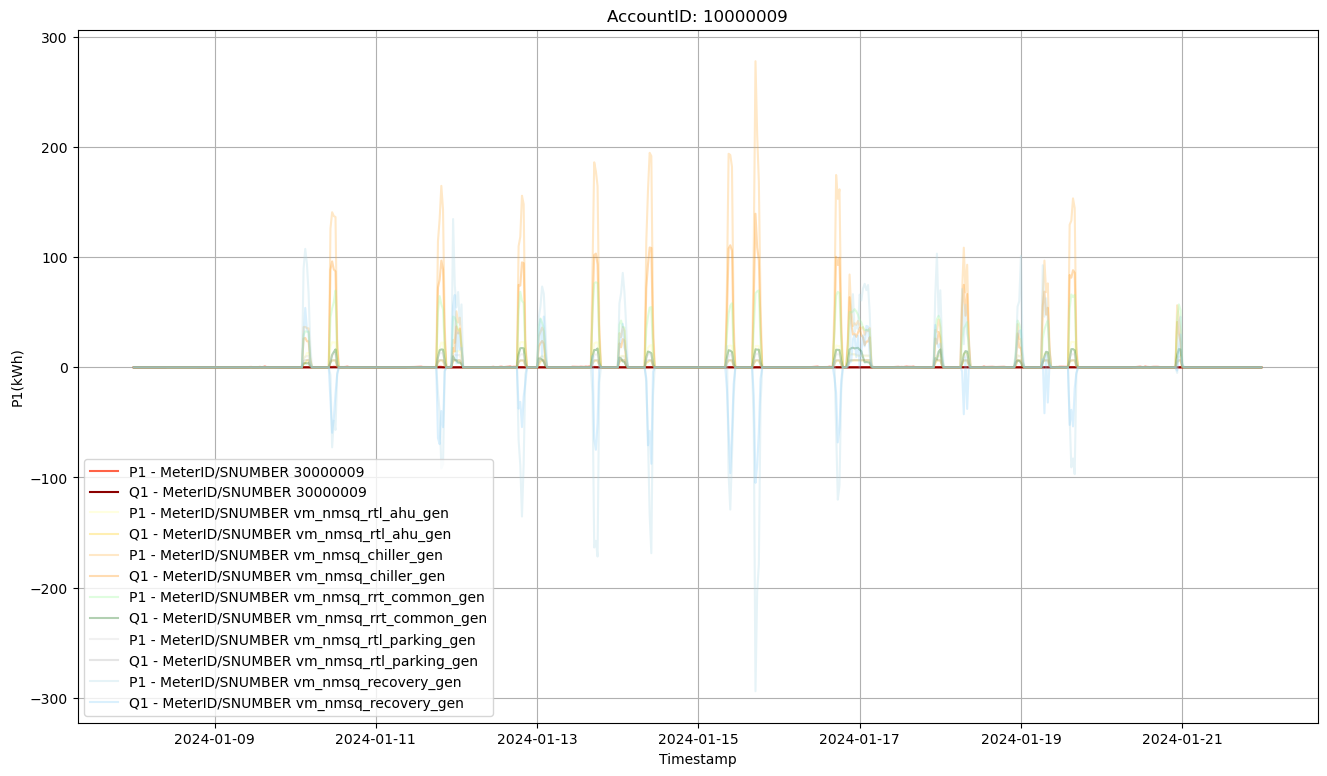

In [92]:
#Let's display a graph to visualise the data that we've been working with

import matplotlib.pyplot as plt
DISPLAY_RAW_DATA = 0

#Ensure any possible open plots are closed.
plt.close('all')

plt.figure(figsize=(16, 9))

# Loop through each unique MeterID
for Unique_MeterID in unique_Meter_ids_computed['SNUMBER']:
    #Unique_MeterID = 68855929 #41159
    print(f"Getting data for MeterID: {Unique_MeterID}")
    
    # Filter the DataFrame for the current MeterID
    meter_df = df_selected_first_month[df_selected_first_month['SNUMBER'] == Unique_MeterID].compute()
        
    if DISPLAY_RAW_DATA:
        display(meter_df.max())
        print(type(Unique_MeterID))

    alpha=0.3
    if 'ahu' in Unique_MeterID:
        linecol_p1 = '#FFFF99'  # Light Yellow
        linecol_q1 = '#FFCC00'  # Darker Yellow (Gold)
    elif 'chiller' in Unique_MeterID:
        linecol_p1 = '#FFB347'  # Light Orange 
        linecol_q1 = '#FF8C00'  # Darker Orange 
    elif 'common' in Unique_MeterID:
        linecol_p1 = '#98FB98'  # Light Green 
        linecol_q1 = '#006400'  # Darker Green 
    elif 'parking' in Unique_MeterID:
        linecol_p1 = '#D3D3D3'  # Light Grey 
        linecol_q1 = '#A9A9A9'  # Darker Grey 
    elif 'recovery' in Unique_MeterID:
        linecol_p1 = '#ADD8E6'  # Light Blue
        linecol_q1 = '#87CEFA'  # Light Sky Blue
    else:
        linecol_p1 = '#FF6347'  # Strong Red (Tomato)
        linecol_q1 = '#8B0000'  # Darker Red (Dark Red)
        alpha=1

    # Plot the data for P1
    plt.plot(meter_df['UnixTimestamp'], meter_df['P1'], label=f'P1 - MeterID/SNUMBER {Unique_MeterID}',color=linecol_p1,alpha=alpha)
    
    # Plot the data for Q1
    plt.plot(meter_df['UnixTimestamp'], meter_df['Q1'], label=f'Q1 - MeterID/SNUMBER {Unique_MeterID}',color=linecol_q1,alpha=alpha)

# Plot settings
plt.title(f'AccountID: {YOUR_ACCOUNT_ID}')
plt.xlabel('Timestamp')
plt.ylabel('P1(kWh)')
plt.legend(loc='best', fontsize='medium')
plt.grid(True)
plt.show()

#Look at this for density probability plot https://towardsdatascience.com/the-matplotlib-line-plot-that-crushes-the-box-plot-912f8d2acd49

#From the graph it would seem that "Common Area Generator Portion" is not just associated with that AccountID but to many other AccountIDs which are shared which explains the large values compared to the standard AC grid value, we will be disregarding the "Common Area Generator Portion" in future calculations. 


## Plotting Data for Grid Supply Meters

To focus on the "Grid Supply" component and analyze its data, we will filter and visualize it separately from other meters like Air handling unit (vm_nmsq_rtl_ahu_gen), Chiller (vm_nmsq_chiller_gen), Common shared area (vm_nmsq_rrt_common_gen) and Parking (vm_nmsq_rtl_parking_gen)

### Steps Involved

1. **Filter Data**:
   - Select rows where `MeterPointType_id` corresponds to "Grid Supply" (ID: 3) and for the specified `AccountID`.
   - Choose relevant columns for plotting, including `AccountID`, `MeterpointID`, `UnixTimestamp`, `MeterID`, `SNUMBER`, `P1`, and `Q1`.

2. **Convert Timestamps**: Convert `UnixTimestamp` to a human-readable datetime format and adjust for the local timezone. Ensure the DataFrame is sorted by `UnixTimestamp`.

3. **Compute Unique Meter IDs**: Identify and display unique `MeterID` values associated with "Grid Supply".

4. **Define Time Range**:
   - Calculate start and end dates for the first month's data.
   - Filter the DataFrame to include data within this time range.

5. **Plot Data**:
   - Close any previously open plots and set up a new figure.
   - Loop through each unique `MeterID`, filter the data, and plot `P1` and `Q1` values with distinct colors.

6. **Customize Plot**:
   - Add title, axis labels, legend, and grid lines.
   - Display the plot for analysis.

This approach isolates the "Grid Supply" component, providing a clear visualization of its associated metrics over time.


Unique MeterID values:


,MeterID,SNUMBER
8,30000009,30000009


The start date for this graph is 2024-01-08 00:00:00-03:30 up to  2024-01-22 00:00:00-03:30, displaying a total of 14 days 00:00:00 of data
Getting data for MeterID: 30000009


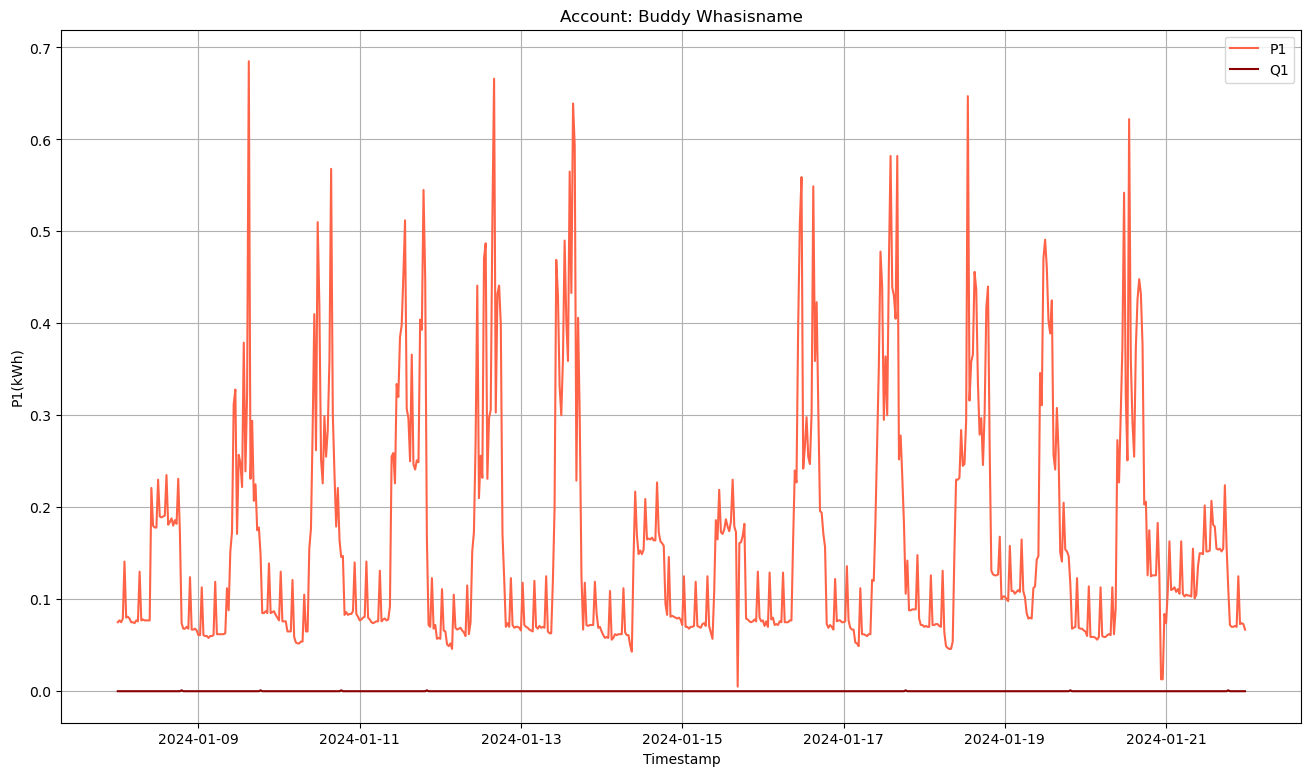

In [93]:
#Since the "Common Area Generator Portion" values are so large it is difficult to see any meaningful data, thus let's isolate just the "Grid Supply" component and plot

DISPLAY_RAW_DATA = 0
METERPOINTTYPE_ID = 3 #Primary Supply/Grid Supply

# Filter the DataFrame based on conditions
df_filtered = df[(df['AccountID'] == YOUR_ACCOUNT_ID) &
                (df['MeterPointType_id'] == METERPOINTTYPE_ID)]

# Select only the columns needed for plotting
selected_columns = ['AccountID', 'MeterpointID','UnixTimestamp', 'MeterID','SNUMBER', 'P1', 'Q1']

df_selected = df_filtered[selected_columns]

# Convert UnixTimestamp to datetime if necessary
df_selected['UnixTimestamp'] = dd.to_datetime(df_selected['UnixTimestamp'], unit='s',utc=True)
df_selected['UnixTimestamp'] = df_selected['UnixTimestamp'].dt.tz_convert('Canada/Newfoundland')#('Africa/Johannesburg')#   # Replace with your local timezone

# Ensure the DataFrame is sorted by UnixTimestamp
df_selected = df_selected.sort_values('UnixTimestamp')

# Compute and display the result
unique_Meter_ids_computed = df_selected[['MeterID','SNUMBER']].drop_duplicates().compute()
print("Unique MeterID values:")
display(unique_Meter_ids_computed)

# Calculate the start and end timestamps for the first month
start_date = df_selected['UnixTimestamp'].min()+ pd.DateOffset(days=START_DAY,weeks=START_WEEK,months=START_MONTH)
end_date = start_date + pd.DateOffset(days=END_DAY,weeks=END_WEEK,months=END_MONTH)

# Filter the DataFrame for the first month's data
df_selected_first_month = df_selected[(df_selected['UnixTimestamp'] >= start_date) &
                                      (df_selected['UnixTimestamp'] < end_date)]

start_date= start_date.compute()
end_date= end_date.compute()

print(f"The start date for this graph is {start_date} up to  {end_date}, displaying a total of {end_date - start_date} of data")

#Ensure any possible open plots are closed.
plt.close('all')

plt.figure(figsize=(16, 9))

# Loop through each unique MeterID
for Unique_MeterID in unique_Meter_ids_computed['SNUMBER']:
    #Unique_MeterID = 68855929 #41159
    print(f"Getting data for MeterID: {Unique_MeterID}")
    
    # Filter the DataFrame for the current MeterID
    meter_df = df_selected_first_month[df_selected_first_month['SNUMBER'] == Unique_MeterID].compute()
    
    if DISPLAY_RAW_DATA:
        display(meter_df.head())
        display(meter_df.max())
        print(type(Unique_MeterID))


    linecol_p1 = '#FF6347'  # Strong Red (Tomato)
    linecol_q1 = '#8B0000'  # Darker Red (Dark Red)
    alpha=1

    # Plot the data for P1
    plt.plot(meter_df['UnixTimestamp'], meter_df['P1'], label=f'P1',color=linecol_p1,alpha=alpha)
    
    # Plot the data for Q1
    plt.plot(meter_df['UnixTimestamp'], meter_df['Q1'], label=f'Q1',color=linecol_q1,alpha=alpha)

# Plot settings
#plt.title(f'AccountID: {YOUR_ACCOUNT_ID}')
plt.title(f'Account: Buddy Whasisname')
plt.xlabel('Timestamp')
plt.ylabel('P1(kWh)')
plt.legend(loc='best', fontsize='medium')
plt.grid(True)
plt.show()

In [81]:
try:
    client
except NameError:
    print("No dask client defined, nothing to shut down.")
else:
    print("Shutting down the Dask client.")
    client.close()
    del client

Shutting down the Dask client.
